<a href="https://colab.research.google.com/github/terkmane/Jeu-Tic-Tac-Toe-en-Python--console-/blob/main/analyse_des_ventes_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
lilianmotabadu_data_set_got_from_kyanyogasample_sales_data_path = kagglehub.dataset_download('lilianmotabadu/data-set-got-from-kyanyogasample-sales-data')

print('Data source import complete.')


In [ ]:
import pandas as pd

In [ ]:
#Chargement du dataset

data = pd.read_csv('/kaggle/input/data-set-got-from-kyanyogasample-sales-data/sales_data_sample.csv', encoding='ISO-8859-1')


In [ ]:
# Afficher les premières lignes du dataset

print(data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [ ]:
# Afficher les informations générales sur le dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
# Résumé statistique

print(data.describe())

        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000000     1.000000  2003.00000    33.000000  
25% 

In [ ]:
# Convertir la colonne 'OrderDate' en type datetime

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

print(data['ORDERDATE'])

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]


In [ ]:
# Créer une colonne 'Month' pour regrouper les données par mois

data['Month'] = data['ORDERDATE'].dt.to_period('M')

print(data['Month'])

0       2003-02
1       2003-05
2       2003-07
3       2003-08
4       2003-10
         ...   
2818    2004-12
2819    2005-01
2820    2005-03
2821    2005-03
2822    2005-05
Name: Month, Length: 2823, dtype: period[M]


In [ ]:
# Agréger les ventes par mois

monthly_sales = data.groupby('Month')['SALES'].sum()

print(monthly_sales)

Month
2003-01     129753.60
2003-02     140836.19
2003-03     174504.90
2003-04     201609.55
2003-05     192673.11
2003-06     168082.56
2003-07     187731.88
2003-08     197809.30
2003-09     263973.36
2003-10     568290.97
2003-11    1029837.66
2003-12     261876.46
2004-01     316577.42
2004-02     311419.53
2004-03     205733.73
2004-04     206148.12
2004-05     273438.39
2004-06     286674.22
2004-07     327144.09
2004-08     461501.27
2004-09     320750.91
2004-10     552924.25
2004-11    1089048.01
2004-12     372802.66
2005-01     339543.42
2005-02     358186.18
2005-03     374262.76
2005-04     261633.29
2005-05     457861.06
Freq: M, Name: SALES, dtype: float64


# Plus d'explications :



•	data['ORDERDATE'].dt.to_period('M') -  Convertit la date en période mensuelle pour une agrégation mensuelle.



•	groupby('Month')['SALES'].sum() -  Agrège les ventes par mois pour calculer les ventes totales.



•	groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10) - Agrège et trie les ventes par produit pour   obtenir les 10 produits les plus performants.


# Analyse des ventes totales au fil du temps pour identifier les tendances saisonnières

In [ ]:
import matplotlib.pyplot as plt

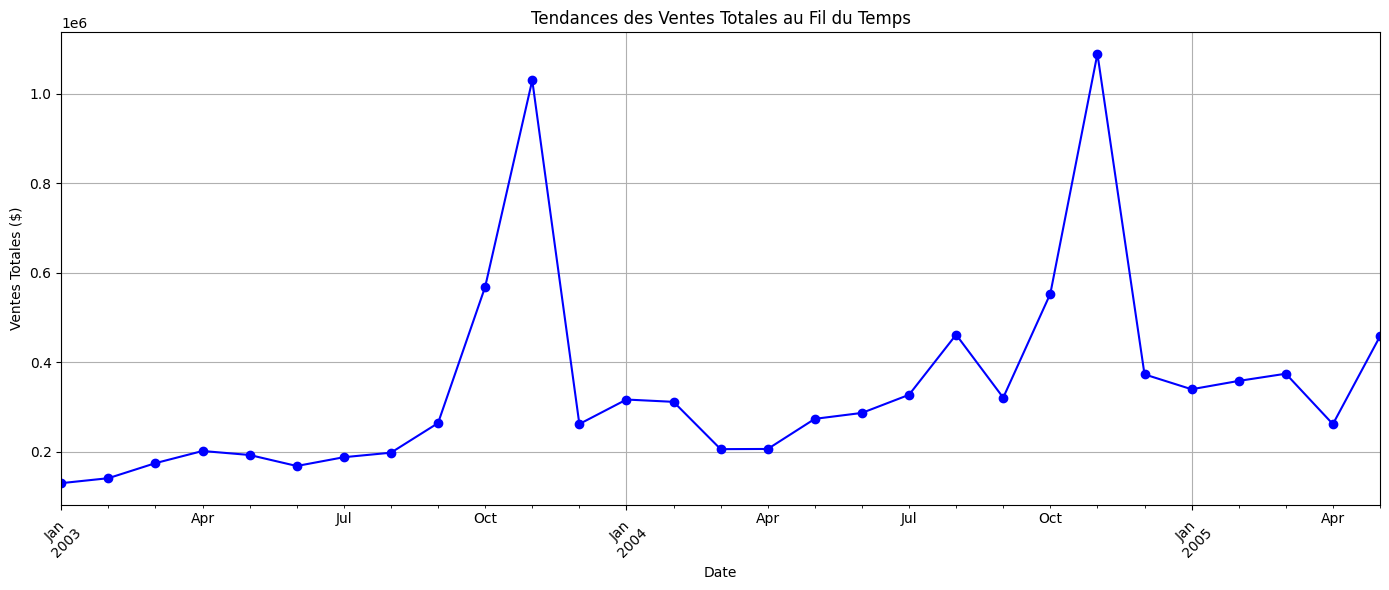

In [ ]:
# Tracer les ventes totales au fil du temps



plt.figure(figsize=(14, 6))

monthly_sales.plot(kind='line', marker='o', color='b')

plt.title('Tendances des Ventes Totales au Fil du Temps')

plt.xlabel('Date')

plt.ylabel('Ventes Totales ($)')

plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

#  Plus d'explications :



•	plt.figure(figsize=(14, 6))- Ça va créer une nouvelle figure avec une taille spécifiée de 14 pouces de large et 6 pouces de haut. Cela aide à rendre le graphique plus lisible, surtout si vous avez beaucoup de données à afficher.



•	monthly_sales.plot(kind='line', marker='o', color='b') : Utilise pandas pour tracer un graphique de ligne des ventes mensuelles (monthly_sales). Le paramètre marker='o' ajoute des cercles à chaque point de donnée sur la ligne, et color='b' définit la couleur de la ligne en bleu.



•	plt.title('Tendances des Ventes Totales au Fil du Temps') : Ajoute un titre au graphique.



•	plt.ylabel('Ventes Totales ($)') : Ajoute une étiquette à l'axe des ordonnées (axe Y) pour indiquer que les valeurs représentent des montants en dollars.



•	plt.grid(True) : Active la grille dans le graphique pour faciliter la lecture des données.



•	plt.xticks(rotation=45) : Fait pivoter les étiquettes de l'axe X de 45 degrés pour les rendre plus lisibles, surtout si elles contiennent des dates ou des informations longues.



•	plt.tight_layout() : Ajuste automatiquement la disposition du graphique pour s'assurer que les étiquettes, titres et autres éléments ne se chevauchent pas et restent bien alignés dans la figure.



•	plt.show() : Affiche le graphique à l'écran.






# Analyse des produits les plus performants

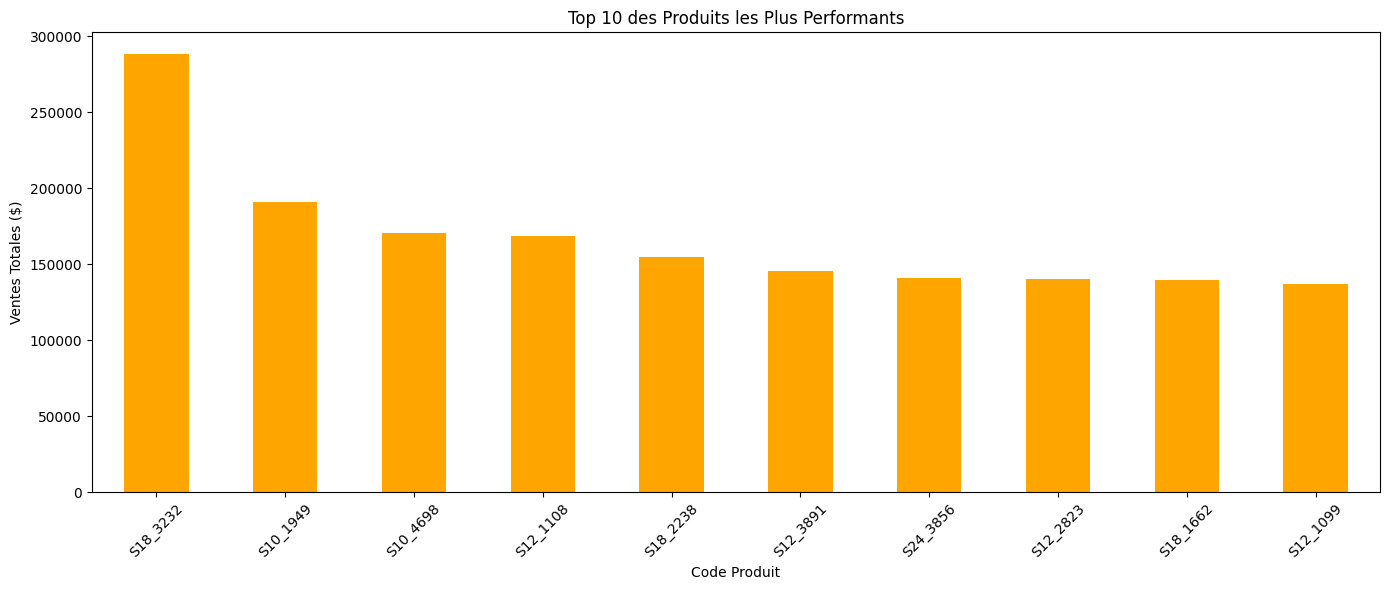

In [ ]:
# Identifier les produits les plus performants en termes de ventes totales

top_products = data.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)



# Tracer un graphique en barres des produits les plus performants

plt.figure(figsize=(14, 6))

top_products.plot(kind='bar', color='orange')

plt.title('Top 10 des Produits les Plus Performants')

plt.xlabel('Code Produit')

plt.ylabel('Ventes Totales ($)')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


# Plus d'explications :



top_products = data.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10) - Trace un graphique en barres où les données de top_products sont affichées. Le paramètre kind='bar' spécifie que le type de graphique est un diagramme en barres, et color='orange' indique la couleur des barres.



•	data.groupby('PRODUCTCODE') : Regroupe les données par la colonne PRODUCTCODE, ce qui signifie que toutes les lignes ayant le même code produit seront considérées ensemble.



•	['SALES'].sum() : Calcule la somme des ventes (SALES) pour chaque groupe de produits.



•	.sort_values(ascending=False) : Trie les produits par ordre décroissant des ventes totales, de sorte que les produits les plus performants apparaissent en premier.



•	.head(10) : Sélectionne les 10 produits les plus performants.



•	plt.figure(figsize=(14, 6)) - plt.figure(figsize=(14, 6)) : Crée une figure de taille 14 pouces de large par 6 pouces de haut pour une meilleure visualisation.



•	top_products.plot(kind='bar', color='orange') - top_products.plot(kind='bar', color='orange') : Trace un graphique en barres où les données de top_products sont affichées. Le paramètre kind='bar' spécifie que le type de graphique est un diagramme en barres, et color='orange' indique la couleur des barres.



•	plt.title('Top 10 des Produits les Plus Performants') - plt.title() : Ajoute un titre au graphique.



•	plt.xlabel('Code Produit') - plt.xlabel('Code Produit') : Ajoute une étiquette à l'axe des abscisses pour indiquer qu'il représente les codes produits.



•	plt.ylabel('Ventes Totales ($)') : Ajoute une étiquette à l'axe des ordonnées, indiquant que les valeurs représentent les ventes totales en dollars.



•	plt.xticks(rotation=45) : Pivote les étiquettes de l'axe X de 45 degrés pour les rendre plus lisibles, surtout si les codes produits sont longs.



•	plt.tight_layout() : Ajuste automatiquement la disposition du graphique pour éviter que les étiquettes et autres éléments ne se chevauchent.



•	plt.show() : Affiche le graphique à l'écran.


In [ ]:
# 1. Identification des produits les plus performants en utilisant seulement code en Python



produits_top = data.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)

print("Produits les plus performants :")

print(produits_top)



# 2. Analyse des tendances mensuelles des ventes

tendances_ventes = data.groupby(data['ORDERDATE'].dt.to_period("M"))['SALES'].sum()

print("\nTendances mensuelles des ventes pour les derniers mois :")

print(tendances_ventes.tail(12))

Produits les plus performants :
PRODUCTCODE
S18_3232    288245.42
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S24_3856    140626.90
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
Name: SALES, dtype: float64

Tendances mensuelles des ventes pour les derniers mois :
ORDERDATE
2004-06     286674.22
2004-07     327144.09
2004-08     461501.27
2004-09     320750.91
2004-10     552924.25
2004-11    1089048.01
2004-12     372802.66
2005-01     339543.42
2005-02     358186.18
2005-03     374262.76
2005-04     261633.29
2005-05     457861.06
Freq: M, Name: SALES, dtype: float64


# Analyse des Tendances de Ventes et Produits les Plus Performants



1.	Produits les Plus Vendus :



•	Le produit avec le plus grand volume de ventes est le code S18_3232, générant un chiffre d'affaires total de 288 245,42$.



•	D'autres produits performants incluent 10_1949$, S10_4698, et S12_1108, chacun générant plus de 150 000$ en ventes.



2.	Tendances Mensuelles des Ventes :



•	Des pics de ventes sont observés en novembre 2004 (1 089 048,01$) et octobre 2004 (552 924,25$), indiquant que la fin de l'année est la période la plus forte en termes de ventes.



•	Une baisse des ventes est visible en avril 2005, avec une reprise en mai 2005.






In [ ]:
# Analyser les données de ventes pour obtenir des insights sur les produits les plus performants et les tendances de ventes



# 1. Vérifier les ventes par produit pour identifier les produits les plus performants

produits_top = data.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)



# 2. Analyser les tendances de ventes par mois et année

# Convertir 'ORDERDATE' en objet datetime pour extraire facilement le mois et l'année

data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')

tendances_ventes = data.groupby(data['ORDERDATE'].dt.to_period("M"))['SALES'].sum()



# Afficher les résultats

produits_top, tendances_ventes.tail(12)  # Afficher les produits les plus performants et les tendances de ventes pour les 12 derniers mois




(PRODUCTCODE
 S18_3232    288245.42
 S10_1949    191073.03
 S10_4698    170401.07
 S12_1108    168585.32
 S18_2238    154623.95
 S12_3891    145332.04
 S24_3856    140626.90
 S12_2823    140006.16
 S18_1662    139421.97
 S12_1099    137177.01
 Name: SALES, dtype: float64,
 ORDERDATE
 2004-06     286674.22
 2004-07     327144.09
 2004-08     461501.27
 2004-09     320750.91
 2004-10     552924.25
 2004-11    1089048.01
 2004-12     372802.66
 2005-01     339543.42
 2005-02     358186.18
 2005-03     374262.76
 2005-04     261633.29
 2005-05     457861.06
 Freq: M, Name: SALES, dtype: float64)

# Plus d'explications :



1.	Cette ligne regroupe les données par PRODUCTCODE, soit le code de chaque produit.



2.	['SALES'].sum() additionne les ventes (SALES) pour chaque produit, permettant d'obtenir le chiffre d'affaires total par produit.



3.	sort_values(ascending=False) trie les produits par chiffre d'affaires de manière décroissante, affichant ceux qui ont généré le plus de ventes en premier.



4.	head(10) sélectionne les 10 produits ayant les plus hauts chiffres d'affaires, pour identifier les produits les plus performants.



5.	La première ligne convertit la colonne ORDERDATE (date de commande) en format datetime pour permettre des calculs sur le temps. Le paramètre errors='coerce' convertit les valeurs invalides en NaT (valeurs manquantes).



6.	Ensuite, groupby(donnees_ventes['ORDERDATE'].dt.to_period("M")) regroupe les ventes par période mensuelle (M), pour obtenir les ventes agrégées par mois.



7.	['SALES'].sum() additionne les ventes pour chaque mois, permettant de voir les tendances de ventes mensuelles.

8.	produits_top affiche les 10 produits les plus performants.



9.	tendances_ventes.tail(12) affiche les ventes mensuelles pour les 12 derniers mois disponibles, permettant d’observer les tendances récentes.


# Stratégies de Ventes Suggérées



1.	Focus sur les Produits Performants :

o	Mettre l'accent sur le marketing et les stocks des produits S18_3232, S10_1949, et S10_4698 peut maximiser les revenus, notamment s'ils sont inclus dans des campagnes saisonnières vers la fin de l'année.



2.	Campagnes Saisonnières pour les Périodes de Forte Demande :

o	Renforcer les promotions et augmenter les stocks des produits les plus vendus avant novembre et décembre pourrait capturer le pic de demande annuel.

o	Mettre en œuvre des réductions ou des packs promotionnels au début du deuxième semestre pour encourager les ventes avant la période de fin d'année.



3.	Suivi Continu des Performances et Ajustement des Stocks :

o	Surveiller les mois de faibles ventes, comme avril, et envisager des promotions pour compenser les baisses saisonnières.

o	Utiliser les données de ventes pour ajuster la production et les stocks en fonction des fluctuations saisonnières, optimisant ainsi les coûts et les inventaires.



Ces stratégies permettront de maintenir un volume de ventes stable et optimisé tout au long de l'année.
